### DSC640
##### Week3-4 assignment. Author: Xin Tang
###### Activity: White House Vistor log study and visualization

In [6]:
# Important packages needed

import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

The original zip file have 3 years data and take a long time to open all of them (sorry I am using an 10 year old computer). so I used the original file and created some new files (based on information from original monthly file) to analysis:
1. summary.xlsx: it includes all months and monthly visitor count (based on TOA count, the records with empty TOA will be consider no visit)
2. 2023-summary.xlsx: it includes all months in 2023 and monthly visitor break down by meeting locations.
3. 2023.12_WAVES.xlsx: this is the month with most visitors records.

In [7]:
#read file into different dataframe 

df_all = pd.read_excel("summary.xlsx")
df_2023 = pd.read_excel("2023-summary.xlsx")
df_2023Dec = pd.read_excel("2023.12_waves.xlsx", sheet_name='2023.12_WAVES')

In [5]:
df_all.head()

,Month,TOA Total
0,2021-7,3790
1,2021-8,1408
2,2021-9,1784
3,2021-10,1984
4,2021-11,3232


In [6]:
df_2023.head()

,Month,TOA Total,WH,VPR,OEOB,NEOB
0,2023-1,26007,20071,234,5373,329
1,2023-2,33686,26158,540,6575,413
2,2023-3,50103,41146,271,8228,458
3,2023-4,47220,39056,426,7230,508
4,2023-5,61643,52114,563,8539,427


In [7]:
df_2023Dec.head()

,Last Name,First Name,Middle Initial,UIN,TOA,POA,TOD,POD,Total People,Terminal Suffix,Meeting Location
0,AABERGSOMOGYI,MARTINA,S,U84967,Dec 4 2023 2:46PM,NaN,NaT,NaN,6,SA,OEOB
1,AAGAARD,ANDREW,L,U91156,Dec 10 2023 8:09PM,NaN,NaT,NaN,50,VW,WH
2,AAL,MICHAEL,J,U80167,Dec 5 2023 11:40AM,NaN,NaT,NaN,4,VW,WH
3,AAL,SABINE,N,U80167,Dec 5 2023 11:40AM,NaN,NaT,NaN,4,VW,WH
4,AALBERS,SYDNEY,P,U82027,Dec 7 2023 11:39AM,NaN,NaT,NaN,4,VW,WH


In [9]:
# Now process each dataframe one by one
# First analysis df_all 

#c Convert date into datatime format
df_all['Month']= pd.to_datetime(df_all['Month'])

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      30 non-null     datetime64[ns]
 1   TOA Total  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


visit volume increased rapidly in Post Covid era


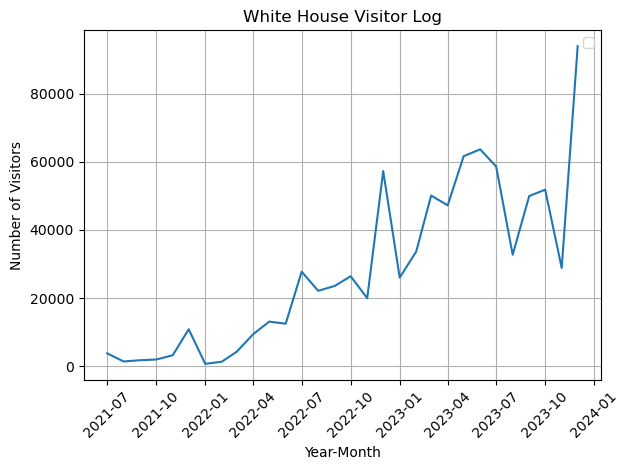

<Figure size 1800x400 with 0 Axes>

In [21]:
# Create line chart to show visitor trend
print('visit volume increased rapidly in Post Covid era')
plt.plot(df_all['Month'], df_all['TOA Total']) # Plot the chart
plt.title('White House Visitor Log')
plt.xlabel('Year-Month')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.figure(figsize=(18, 4))
plt.show()


In [3]:
# use 2023 file to get more information

# first convert month to datatime format
df_2023['Month']= pd.to_datetime(df_2023['Month'])    

west wing is always the most popular building to visit


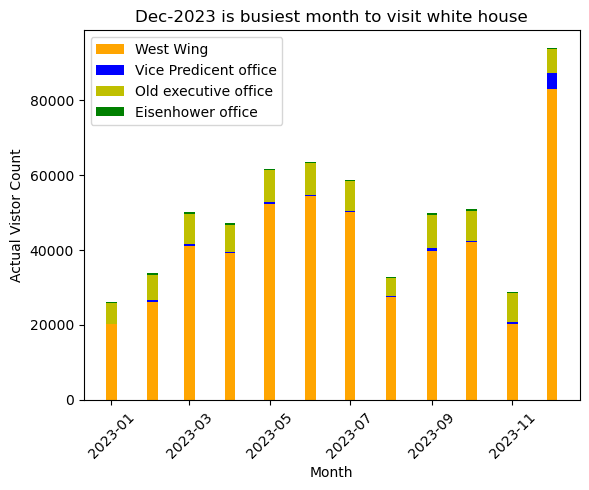

In [50]:
# create a stacked column chart with time
x = df_2023['Month']
y1 = df_2023['WH']
y2 = df_2023['VPR']
y3 = df_2023['OEOB']
y4 = df_2023['NEOB']
 
# plot bars in stack manner
print("west wing is always the most popular building to visit")
plt.bar(x, y1, width =8, color='orange')
plt.bar(x, y2, width =8, bottom=y1, color='b')
plt.bar(x, y3, width =8, bottom=y1+y2, color='y')
plt.bar(x, y4, width =8, bottom=y1+y2+y3, color='g')
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Actual Vistor Count")
plt.legend(["West Wing", "Vice Predicent office", "Old executive office", "Eisenhower office"])
plt.title("Dec-2023 is busiest month to visit white house")

plt.show()

In [8]:
# now visualize the visit per building
total_WH = df_2023['WH'].sum()
total_VPR = df_2023['VPR'].sum()
total_OEOB = df_2023['OEOB'].sum()
total_NEOB = df_2023['NEOB'].sum()

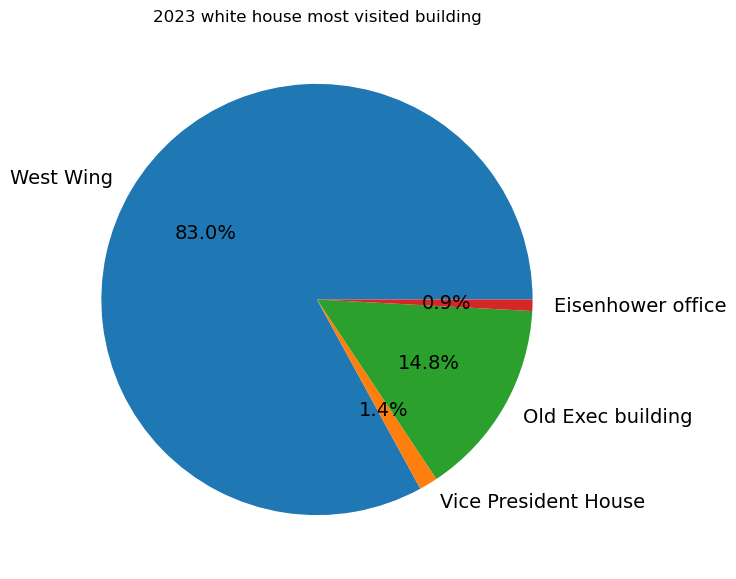

In [9]:
# create pie chart
buildings = ['West Wing', 'Vice President House', 'Old Exec building','Eisenhower office']
Count = [total_WH, total_VPR, total_OEOB, total_NEOB] 

fig = plt.figure(figsize=(10, 7))
plt.pie(Count, labels=buildings, autopct='%0.1f%%', textprops={'fontsize': 14})
plt.title('2023 white house most visited building')

plt.show()

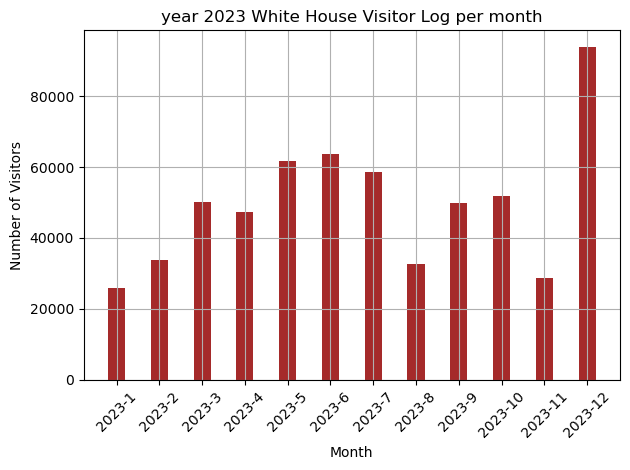

In [19]:
# now use column chart to visualize the 2023 visitor volume change month by month

plt.bar(df_2023['Month'], df_2023['TOA Total'], color ='brown', width = 0.4)
plt.title('year 2023 White House Visitor Log per month')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
#plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

most common white house tour group size in year 2023 is 10.0


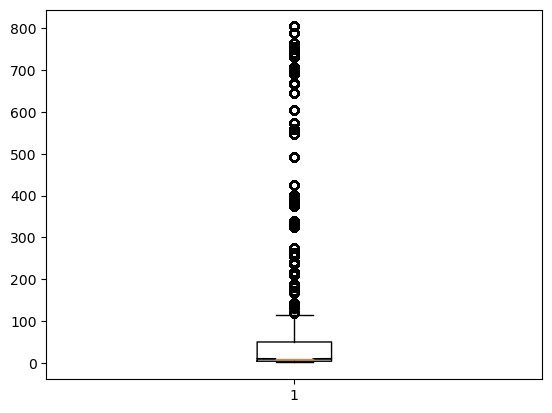

In [8]:
# now look at the tour group size distribution using boxplot

import statistics
plt.boxplot(df_2023Dec['Total People'], notch=True)
print('most common white house tour group size in year 2023 is', df_2023Dec['Total People'].median())

In [30]:
#now check 2023 Daily visitor count using step chart
df_2023Decdaily = pd.read_excel("2023.12_waves.xlsx", sheet_name='Daily')
df_2023Decdaily.tail(10)

,Date,TOA daily total
21,Dec 22 2023,2649
22,Dec 23 2023,6867
23,Dec 24 2023,14
24,Dec 25 2024,4
25,Dec 26 2023,144
26,Dec 27 2023,154
27,Dec 28 2023,128
28,Dec 29 2023,190
29,Dec 30 2023,284
30,Dec 31 2023,1


In [27]:
# convert date to timedate format
df_2023Decdaily['Date']= pd.to_datetime(df_2023Decdaily['Date'])

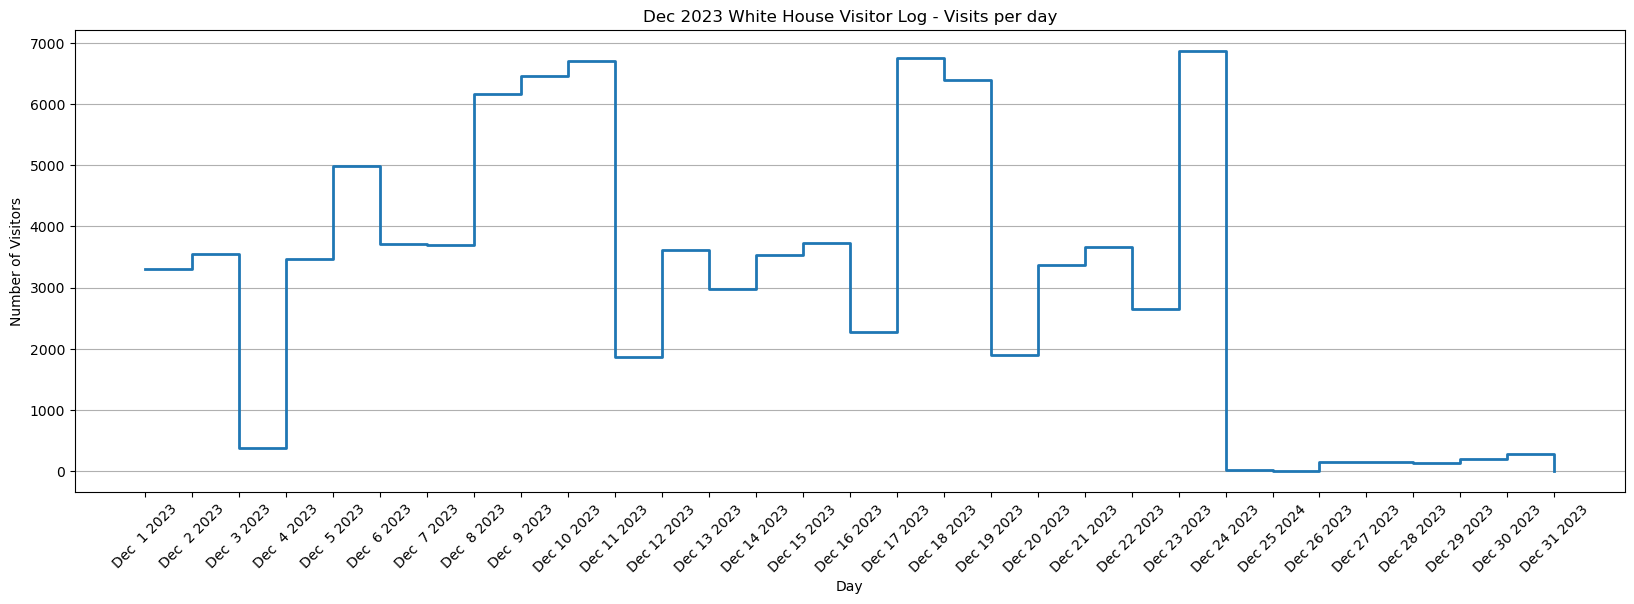

In [31]:
# Plotting the step chart
plt.figure(figsize=(20, 6))
plt.step(df_2023Decdaily['Date'], df_2023Decdaily['TOA daily total'], where='post', label='Visitors Count', linewidth=2)
plt.title('Dec 2023 White House Visitor Log - Visits per day')
plt.xlabel('Day')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [32]:
# End of python code